In [29]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, cohen_kappa_score, accuracy_score, roc_auc_score
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, log_loss
import seaborn as sns
import numpy as np
import xgboost as xgb




%matplotlib inline

In [3]:
df = pd.read_feather(r'AMCRED\BLUSOL\BLUSOL\big_frame_4.feather')

In [4]:

x_train,x_test,y_train,y_test = train_test_split(df.drop('DEFAULT',axis = 1).values,df['DEFAULT'].values,test_size = 0.25, random_state= 333)

In [6]:

# Define the XGBoost classifier and the parameter grid for GridSearchCV
classifier = xgb.XGBClassifier()
parameters = {
    'learning_rate': [0.01,0.03],
    'max_depth': [5, 6],
    'min_child_weight': [4],
    'n_estimators': [1000,1100, 1200],
    'scale_pos_weight':list(range(20,60,10)),
    "colsample_bytree":[0.75,0.5,1],
    "gamma":[0.001,0.01,0.2]}

# Create an instance of GridSearchCV with the classifier and parameter grid
gridsearch = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='roc_auc', cv=5)

# Fit the GridSearchCV instance to the training data
grid=gridsearch.fit(x_train, y_train)

In [7]:
# Find the best parameters and the best score
best_params = grid.best_params_
best_score = grid.best_score_
print(best_score)
print(best_params)

0.9396702048369964
{'colsample_bytree': 0.5, 'gamma': 0.01, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 1100, 'scale_pos_weight': 20}


In [9]:
final=classifier.fit(x_train, y_train)
y_pred = final.predict(x_test)

<AxesSubplot: >

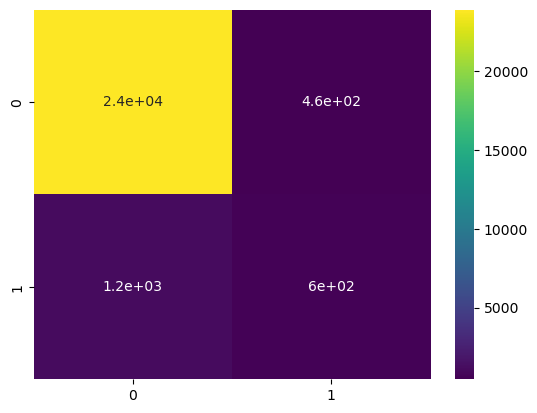

In [10]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='viridis')

In [11]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.95      0.98      0.97     24340
        True       0.57      0.34      0.42      1781

    accuracy                           0.94     26121
   macro avg       0.76      0.66      0.69     26121
weighted avg       0.93      0.94      0.93     26121



In [12]:


roc_auc = roc_auc_score(y_test, y_pred)
cohen_kappa = cohen_kappa_score(y_test, y_pred)

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)
print("ROC AUC: ", roc_auc)
print("Cohen's Kappa: ", cohen_kappa)


Best Parameters:  {'colsample_bytree': 0.5, 'gamma': 0.01, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 1100, 'scale_pos_weight': 20}
Best Score:  0.9396702048369964
ROC AUC:  0.6587966562044256
Cohen's Kappa:  0.39156086625655073


x,y = df.drop('DEFAULT',axis = 1).values,df['DEFAULT'].values
cv = KFold(n_splits = 5)
params = {'max_depth': [5,6,7,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7],
         'scale_pos_weight':list(range(30,60,10))}

#Scores Kapp e AUC
kappa_scorer = make_scorer(cohen_kappa_score)
auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

scoring_metrics = {'kappa': kappa_scorer, 'auc': auc_scorer}
                           
model = xgb.XGBClassifier()
grid = GridSearchCV(estimator = model, param_grid = params, cv = cv, scoring=scoring_metrics,verbose = 1, refit="auc")
grid_result = grid.fit(x,y)

def metric(real,pred):
    return np.where(pred[real == 1] < 1,np.power(pred[real == 1],2),1).sum() * 100 + np.where(pred[real == 0] > 0,np.power(1 - pred[real == 0],2),1).sum()

scorer = make_scorer(metric)

clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=3,cv = cv)

In [42]:
final.save_model("modelo_xgb_V1.txt")

In [14]:
# Define the XGBoost classifier and the parameter grid for GridSearchCV
classifier = xgb.XGBClassifier()
parameters = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [4, 5, 6, 7],
    'n_estimators': [100, 500, 1000],
    'min_child_weight': [3, 4, 5],
    'scale_pos_weight':list(range(20,60,10))}

# Create an instance of GridSearchCV with the classifier and parameter grid
kappa_scorer = make_scorer(cohen_kappa_score)
gridsearch = GridSearchCV(estimator=classifier, param_grid=parameters, scoring=kappa_scorer, cv=5)

# Fit the GridSearchCV instance to the training data
grid=gridsearch.fit(x_train, y_train)

In [15]:
# Find the best parameters and the best score
best_params = grid.best_params_
best_score = grid.best_score_
print(best_score)
print(best_params)

0.45220489305927386
{'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 1000, 'scale_pos_weight': 30}


In [16]:
final1=classifier.fit(x_train, y_train)
y_pred = final.predict(x_test)

<AxesSubplot: >

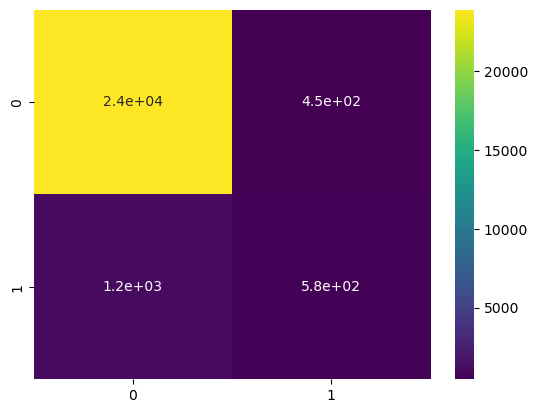

In [17]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='viridis')

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.95      0.98      0.97     24365
        True       0.56      0.33      0.42      1756

    accuracy                           0.94     26121
   macro avg       0.76      0.66      0.69     26121
weighted avg       0.93      0.94      0.93     26121



In [19]:
roc_auc = roc_auc_score(y_test, y_pred)
cohen_kappa = cohen_kappa_score(y_test, y_pred)

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)
print("ROC AUC: ", roc_auc)
print("Cohen's Kappa: ", cohen_kappa)


Best Parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 1000, 'scale_pos_weight': 30}
Best Score:  0.45220489305927386
ROC AUC:  0.6570524581780411
Cohen's Kappa:  0.38815020877252115


### Rede Neural Classifier

In [23]:

df.head()

,situacaodoimovelderesidencia,nropessoasnacasa,situacaoimoveldeatividade,tipodeponto,formacaoescolar,constituicao,pessoafisicajuridica,nrodefuncionarios,rendafamiliarmensal,totaldasreceitas,finalidadeemprestimo,taxaaomes,valoremprestado,quantidadeparcelas,conceitospc,valorparcela,pesoparcela,DEFAULT
0,-0.642253,0.313479,0.030079,-0.629161,-0.031697,0.360688,1.890953,-0.058765,-0.004641,-0.013619,-0.775184,0.425537,-0.736380,-0.578737,3.065097,-0.353105,-0.454706,False
1,-0.642253,-0.078087,0.030079,1.589402,0.057219,0.360688,1.890953,-0.058765,-0.001092,-0.011746,-0.775184,0.425537,-0.063955,1.164573,-0.478508,-0.224240,-0.349945,False
2,2.087291,-0.078087,2.838781,1.589402,-0.031697,0.360688,1.890953,0.482467,-0.012919,0.033630,-0.775184,-0.360870,0.968164,1.164573,-0.478508,0.098897,-0.549765,False
3,-0.642253,0.705045,0.030079,1.589402,0.057219,-0.560714,0.098972,-0.058765,-0.001092,-0.001411,1.417033,-0.630729,-0.491908,-0.827781,-0.478508,-0.120299,-0.398116,False
4,-0.642253,-0.078087,-0.540502,-0.629161,-0.031697,-1.488522,-0.597817,0.121645,-0.001092,-0.004318,-0.775184,-0.630729,-0.572463,-0.827781,-0.478508,-0.184078,-0.391048,False


In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
# Function to generate Deep ANN model 
from keras.models import Sequential
from keras.layers import Dense, PReLU
from keras.models import load_model
from keras.layers import LeakyReLU
 

In [6]:
print(x_train.shape)

(78361, 17)


In [7]:
y_train.astype(int)

array([0, 1, 0, ..., 0, 1, 0])

In [32]:
classifier = Sequential()
classifier.add(Dense(units=100, input_dim=17, kernel_initializer='uniform', activation=LeakyReLU(alpha=0.1)))
classifier.add(Dense(units=60, kernel_initializer='uniform', activation=LeakyReLU(alpha=0.1)))
classifier.add(Dense(units=50, kernel_initializer='uniform', activation=PReLU(alpha_initializer='zeros')))
classifier.add(Dense(units=40, kernel_initializer='uniform', activation=PReLU(alpha_initializer='zeros')))
classifier.add(Dense(units=30, kernel_initializer='uniform', activation=PReLU(alpha_initializer='zeros')))
classifier.add(Dense(units=20, kernel_initializer='uniform', activation=PReLU(alpha_initializer='zeros')))
classifier.add(Dense(units=19, kernel_initializer='uniform', activation=PReLU(alpha_initializer='zeros')))
classifier.add(Dense(units=18, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=14, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fitting the Neural Network on the training data
classifier.fit(x_train,y_train.astype(int), batch_size=50 , epochs=150, verbose=1)
 

Epoch 1/150
1568/1568 [==============================] - 4s 2ms/step - loss: 0.1753 - accuracy: 0.9332
Epoch 2/150
1568/1568 [==============================] - 4s 2ms/step - loss: 0.1447 - accuracy: 0.9349
Epoch 3/150
1568/1568 [==============================] - 4s 2ms/step - loss: 0.1438 - accuracy: 0.9362
Epoch 4/150
1568/1568 [==============================] - 3s 2ms/step - loss: 0.1427 - accuracy: 0.9371
Epoch 5/150
1568/1568 [==============================] - 3s 2ms/step - loss: 0.1420 - accuracy: 0.9378
Epoch 6/150
1568/1568 [==============================] - 3s 2ms/step - loss: 0.1414 - accuracy: 0.9385
Epoch 7/150
1568/1568 [==============================] - 3s 2ms/step - loss: 0.1414 - accuracy: 0.9379
Epoch 8/150
1568/1568 [==============================] - 4s 2ms/step - loss: 0.1406 - accuracy: 0.9381
Epoch 9/150
1568/1568 [==============================] - 4s 3ms/step - loss: 0.1402 - accuracy: 0.9382
Epoch 10/150
1568/1568 [==============================] - 4s 3ms/step - l

In [33]:
# equivalent to: model.save("model.h5")
from keras.models import save_model
save_model(classifier, "model_DeepV2.h5")

In [20]:
type(x_train)
#dfx_train=pd.DataFrame(x_train)
#dfy_train=pd.DataFrame(y_train)
#dfx_test=pd.DataFrame(x_test)
#dfy_test=pd.DataFrame(y_test)

In [23]:
#PReLU(alpha_initializer='zeros')
#model.add(LeakyReLU(alpha=leaky_relu_alpha))
#LeakyReLU(alpha=0.1)


#dfx_train.to_csv('x_train.csv')
#dfy_train.to_csv('y_train.csv')
#dfx_test.to_csv('x_test.csv')
#dfy_test.to_csv('y_test.csv')

In [28]:
y_bin = y_train.astype(int)
# Defining a function for finding best hyperparameters
def FunctionFindBestParams(x_train, y_bin):
    
    # Defining the list of hyper parameters to try
    TrialNumber=0
    batch_size_list=[10, 15, 20, 25, 50]
    epoch_list=[50 ,100, 150]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            
            # Creating the classifier ANN model
            classifier = Sequential()
            classifier.add(Dense(units=100, input_dim=17, kernel_initializer='uniform', activation=LeakyReLU(alpha=0.1)))
            classifier.add(Dense(units=60, kernel_initializer='uniform', activation=LeakyReLU(alpha=0.1)))
            classifier.add(Dense(units=50, kernel_initializer='uniform', activation=PReLU(alpha_initializer='zeros')))
            classifier.add(Dense(units=40, kernel_initializer='uniform', activation=PReLU(alpha_initializer='zeros')))
            classifier.add(Dense(units=30, kernel_initializer='uniform', activation=PReLU(alpha_initializer='zeros')))
            classifier.add(Dense(units=20, kernel_initializer='uniform', activation=PReLU(alpha_initializer='zeros')))
            classifier.add(Dense(units=19, kernel_initializer='uniform', activation=PReLU(alpha_initializer='zeros')))
            classifier.add(Dense(units=18, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=14, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
            classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
 
            
            survivalANN_Model=classifier.fit(x_train,y_bin, batch_size=batch_size_trial , epochs=epochs_trial, verbose=0)
            # Fetching the accuracy of the training
            Accuracy = survivalANN_Model.history['accuracy'][-1]
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', Accuracy)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
                            'batch_size'+str(batch_size_trial)+'-'+'epoch'+str(epochs_trial), Accuracy]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 
###############################################
 
# Calling the function
ResultsData=FunctionFindBestParams(x_train, y_bin)

#Mudanças possíveis
#Otimizador rmsprop




1 Parameters: batch_size: 10 - epochs: 50 Accuracy: 0.942216157913208


C:\Users\igor-\AppData\Local\Temp\ipykernel_28952\2747282679.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


2 Parameters: batch_size: 10 - epochs: 100 Accuracy: 0.9452661275863647


C:\Users\igor-\AppData\Local\Temp\ipykernel_28952\2747282679.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


3 Parameters: batch_size: 10 - epochs: 150 Accuracy: 0.9510470628738403


C:\Users\igor-\AppData\Local\Temp\ipykernel_28952\2747282679.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


4 Parameters: batch_size: 15 - epochs: 50 Accuracy: 0.942509651184082


C:\Users\igor-\AppData\Local\Temp\ipykernel_28952\2747282679.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


5 Parameters: batch_size: 15 - epochs: 100 Accuracy: 0.9483289122581482


C:\Users\igor-\AppData\Local\Temp\ipykernel_28952\2747282679.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


6 Parameters: batch_size: 15 - epochs: 150 Accuracy: 0.9500644207000732


C:\Users\igor-\AppData\Local\Temp\ipykernel_28952\2747282679.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


7 Parameters: batch_size: 20 - epochs: 50 Accuracy: 0.9422544240951538


C:\Users\igor-\AppData\Local\Temp\ipykernel_28952\2747282679.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


8 Parameters: batch_size: 20 - epochs: 100 Accuracy: 0.949209451675415


C:\Users\igor-\AppData\Local\Temp\ipykernel_28952\2747282679.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


9 Parameters: batch_size: 20 - epochs: 150 Accuracy: 0.9516978859901428


C:\Users\igor-\AppData\Local\Temp\ipykernel_28952\2747282679.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


10 Parameters: batch_size: 25 - epochs: 50 Accuracy: 0.9427266120910645


C:\Users\igor-\AppData\Local\Temp\ipykernel_28952\2747282679.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


11 Parameters: batch_size: 25 - epochs: 100 Accuracy: 0.9472951889038086


C:\Users\igor-\AppData\Local\Temp\ipykernel_28952\2747282679.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


12 Parameters: batch_size: 25 - epochs: 150 Accuracy: 0.953356921672821


C:\Users\igor-\AppData\Local\Temp\ipykernel_28952\2747282679.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


13 Parameters: batch_size: 50 - epochs: 50 Accuracy: 0.9420502781867981


C:\Users\igor-\AppData\Local\Temp\ipykernel_28952\2747282679.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


14 Parameters: batch_size: 50 - epochs: 100 Accuracy: 0.9520552158355713


C:\Users\igor-\AppData\Local\Temp\ipykernel_28952\2747282679.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


15 Parameters: batch_size: 50 - epochs: 150 Accuracy: 0.9531399607658386


C:\Users\igor-\AppData\Local\Temp\ipykernel_28952\2747282679.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


In [26]:
ResultsData

,TrialNumber,Parameters,Accuracy
0,1,batch_size10-epoch50,0.941604
0,2,batch_size10-epoch100,0.946861
0,3,batch_size10-epoch150,0.948610
0,4,batch_size15-epoch50,0.943352
0,5,batch_size15-epoch100,0.949095
0,6,batch_size15-epoch150,0.951787
0,7,batch_size20-epoch50,0.942152
0,8,batch_size20-epoch100,0.947844
0,9,batch_size20-epoch150,0.953893
0,10,batch_size25-epoch50,0.942790


  TrialNumber             Parameters  Accuracy
0          12  batch_size15-epoch100  0.942548


<AxesSubplot: xlabel='Parameters'>

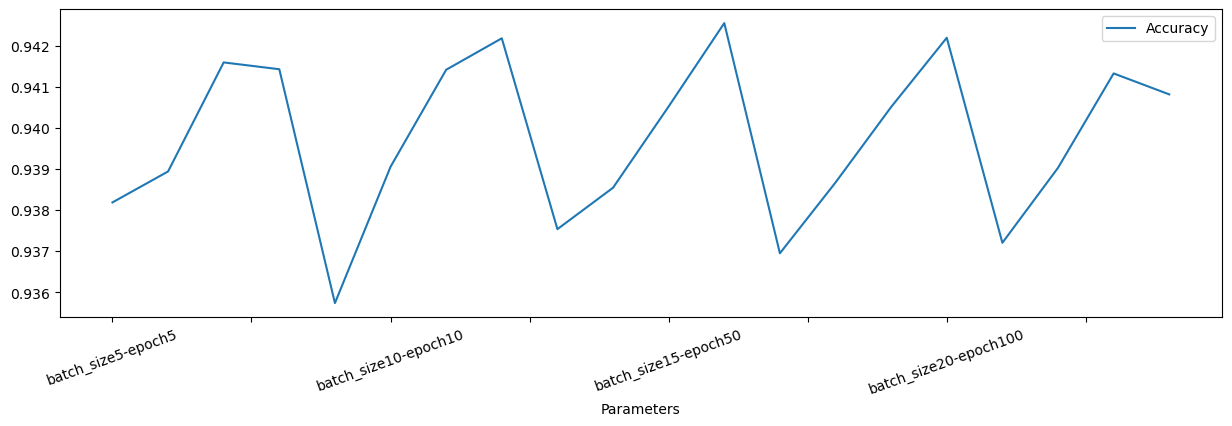

In [61]:

# Printing the best parameter
print(ResultsData.sort_values(by='Accuracy', ascending=False).head(1))
 

# Visualizing the results
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line', rot=20)

In [105]:
for i, layer in enumerate (classifier.layers):
    print (i, layer)
    try:
        print ("    ",layer.activation)
    except AttributeError:
        print('   no activation attribute')

0 <keras.layers.core.dense.Dense object at 0x000001F8CC00D910>
1 <keras.layers.core.dense.Dense object at 0x000001F8CC082AC0>
2 <keras.layers.core.dense.Dense object at 0x000001F8CB819D30>
3 <keras.layers.core.dense.Dense object at 0x000001F8CB819460>
4 <keras.layers.core.dense.Dense object at 0x000001F8A153F8B0>
5 <keras.layers.core.dense.Dense object at 0x000001F8A153F5E0>
6 <keras.layers.core.dense.Dense object at 0x000001F8629ABEB0>
7 <keras.layers.core.dense.Dense object at 0x000001F84E6AB070>
     <function sigmoid at 0x000001F8553ACAF0>


In [113]:

# Training the model with best hyperparamters
bb=classifier.fit(x_train,y_train, batch_size=25 , epochs=150, verbose=1)
bb

Epoch 1/100
3135/3135 [==============================] - 7s 2ms/step - loss: 0.1350 - accuracy: 0.9408
Epoch 2/100
3135/3135 [==============================] - 6s 2ms/step - loss: 0.1347 - accuracy: 0.9416
Epoch 3/100
3135/3135 [==============================] - 7s 2ms/step - loss: 0.1349 - accuracy: 0.9410
Epoch 4/100
3135/3135 [==============================] - 7s 2ms/step - loss: 0.1347 - accuracy: 0.9413
Epoch 5/100
3135/3135 [==============================] - 6s 2ms/step - loss: 0.1350 - accuracy: 0.9408
Epoch 6/100
3135/3135 [==============================] - 6s 2ms/step - loss: 0.1348 - accuracy: 0.9406
Epoch 7/100
3135/3135 [==============================] - 6s 2ms/step - loss: 0.1345 - accuracy: 0.9409
Epoch 8/100
3135/3135 [==============================] - 6s 2ms/step - loss: 0.1344 - accuracy: 0.9410
Epoch 9/100
3135/3135 [==============================] - 6s 2ms/step - loss: 0.1346 - accuracy: 0.9411
Epoch 10/100
3135/3135 [==============================] - 6s 2ms/step - l

In [111]:
import matplotlib.pyplot as plt

Test loss for Keras Leaky ReLU CNN: 0.1476626992225647 / Test accuracy: 0.9349948167800903


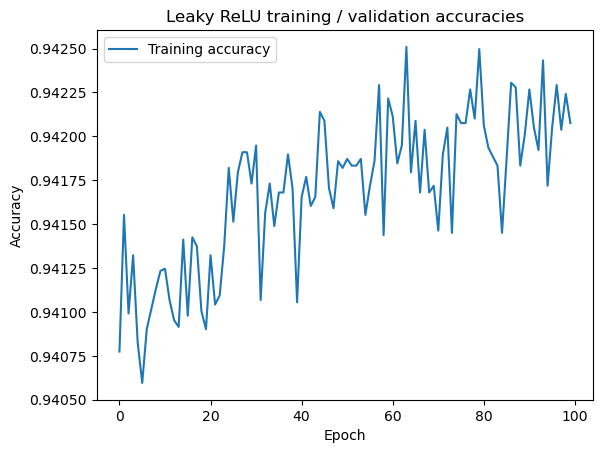

In [119]:
score = classifier.evaluate(x_test, y_test, verbose=0)
print(f'Test loss for Keras Leaky ReLU CNN: {score[0]} / Test accuracy: {score[1]}')

plt.plot(bb.history['accuracy'], label='Training accuracy')
plt.title('Leaky ReLU training / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [120]:
# equivalent to: model.save("model.h5")
save_model(classifier, "modelv4.h5")

In [74]:
# load model
model = load_model('modelv3.h5')
# summarize model.
model.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_295 (Dense)           (None, 19)                342       
                                                                 
 dense_296 (Dense)           (None, 14)                280       
                                                                 
 dense_297 (Dense)           (None, 13)                195       
                                                                 
 dense_298 (Dense)           (None, 12)                168       
                                                                 
 dense_299 (Dense)           (None, 6)                 78        
                                                                 
 dense_300 (Dense)           (None, 1)                 7         
                                                                 
Total params: 1,070
Trainable params: 1,070
Non-train

In [75]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 93.56%


In [76]:

# Predictions on testing data
Predictions=model.predict(x_test)
 
 


817/817 [==============================] - 1s 646us/step


# Generating a data frame for analyzing the test data
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Survival']=y_test
TestingData['PredictedSurvivalProb']=Predictions
 
# Defining the probability threshold
def probThreshold(inpProb):
    if inpProb  >  0.5:
        return(1)
    else:
        return(0)
 
# Generating predictions on the testing data by applying probability threshold
TestingData['PredictedSurvival']=TestingData['PredictedSurvivalProb'].apply(probThreshold)
print(TestingData.head())

from sklearn import metrics
print('\n######### Testing Accuracy Results #########')
print(metrics.classification_report(TestingData['Survival'], TestingData['PredictedSurvival']))
print(metrics.confusion_matrix(TestingData['Survival'], TestingData['PredictedSurvival']))